<a href="https://colab.research.google.com/github/tejareddytadi/Valmikis-vision/blob/main/Valmikis_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.models as models
import torch.optim as optim
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/ramayana'

In [ ]:
classes = os.listdir(train_dir)
num_classes = len(classes)

In [ ]:
b = 32
train = ImageFolder(train_dir, transform= transforms.Compose([transforms.ToTensor(),
                                                              transforms.Resize(32),
        transforms.CenterCrop(32),]))
trainloader = torch.utils.data.DataLoader(train, batch_size=b, shuffle=True)

In [ ]:
resnet = models.resnet18(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 248MB/s]


In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(resnet.parameters())

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = resnet(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features, num_classes)

In [ ]:
in_features = resnet.fc.in_features
dropout_prob = 0.4
resnet.fc = nn.Sequential(
    nn.Linear(in_features, 512),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(512, num_classes)
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch: 0/5, Train acc: 56.95
Epoch: 1/5, Train acc: 80.27
Epoch: 2/5, Train acc: 90.58
Epoch: 3/5, Train acc: 95.07
Epoch: 4/5, Train acc: 93.72


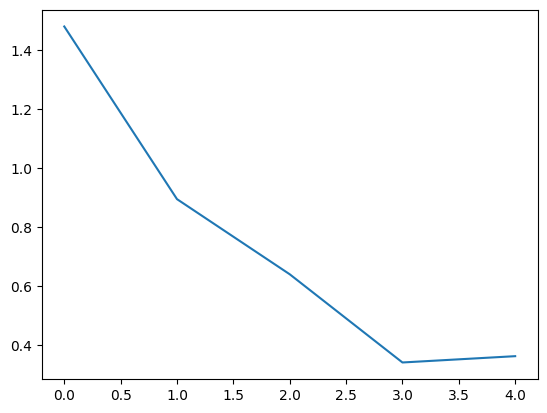

In [ ]:
loss_epoch_arr = []
max_epochs = 5


min_loss = 1000

n_iters = np.ceil(50000/b)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        #inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = resnet(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Train acc: %0.2f' % (
        epoch, max_epochs,
         evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()

In [ ]:
def information(name):
  if(name == 'rama') :
    print('Name of the Character = Rama \n\n  In the epic Ramayana, Lord Rama plays a pivotal role as the protagonist, embodying righteousness and fulfilling his divine purpose.\nBorn as the prince of Ayodhya, Rama\'s exile from his kingdom sets in motion a series of events.\nWith unwavering loyalty, Rama embarks on a quest to rescue his beloved wife, Sita, who has been abducted by the demon king Ravana.\nSupported by his loyal brother Lakshmana and the mighty Hanuman, Rama faces numerous challenges and tests of his character.\nHe displays immense valor during the epic battle with Ravana, ultimately vanquishing the demon king and liberating Sita.\nRama\'s unwavering adherence to his duties and righteousness makes him a revered symbol of virtue and an inspiration for generations.\nHis teachings on dharma, devotion, and the importance of upholding truth continue to guide and inspire people in their lives.\nThe story of Lord Rama in the Ramayana serves as a timeless epic that imparts valuable life lessons and highlights the triumph of good over evil')
  elif(name == 'sita'):
    print('Name of the Character = Sita \n\n In the epic Ramayana, Sita, the wife of Lord Rama, plays a significant role as a symbol of purity, loyalty, and strength.\nHer unwavering devotion to Rama is evident as she accompanies him into exile and faces hardships with grace.\nSita\'s abduction by Ravana sets in motion the epic quest of Rama to rescue her, showcasing her role as a catalyst for the story\'s events.\nThroughout her captivity, Sita demonstrates immense resilience and moral strength, never compromising her values or fidelity to Rama.\nHer purity is tested, and she emerges unscathed, becoming an embodiment of virtue and righteousness.\nUpon her rescue, Sita\'s purity is reaffirmed through the Agni Pariksha , establishing her innocence and honor.\nSita\'s character teaches important lessons about loyalty, devotion, and the strength of a woman, leaving an indelible mark on the Ramayana and Hindu mythology.\nHer story continues to inspire and empower women, emphasizing the significance of inner strength and unwavering faith.')
  elif(name == 'hanuman'):
    print('Name of the Character = Hanuman \n\n In the epic Ramayana, Hanuman, the revered devotee of Lord Rama, plays a pivotal role as a symbol of unwavering devotion and selflessness.\nEndowed with extraordinary strength and intelligence, Hanuman becomes an invaluable ally and messenger for Rama.\nHis determination and courage lead him to undertake daring feats, such as leaping across the ocean to find Sita.\nHanuman\'s humility and loyalty shine through his unwavering support, inspiring all with his noble qualities.\nWith his profound wisdom and devotion, Hanuman becomes a source of guidance and inspiration for seekers of truth and righteousness.\nHis steadfast devotion to Rama and his pivotal contributions to the epic narrative make him an iconic character.\nHanuman\'s story continues to resonate, reminding humanity of the power of faith, devotion, and selfless service.\nHis exemplary qualities make him a beloved figure, symbolizing the triumph of good over evil.')
  elif(name == 'jambavantha'):
    print('Name of the character = Jambavantha \n\n In the epic Ramayana, Jambavanta, the wise and valorous bear, plays a significant role as a trusted advisor and ally of Lord Rama.\nHis vast knowledge and experience guide Rama and his army in their search for Sita.\nJambavanta\'s strength and wisdom prove invaluable in the battles fought against formidable adversaries.\nHe provides crucial assistance during the search for the divine Sanjivani herb to revive Lakshmana.\nJambavanta\'s unwavering loyalty and selfless dedication to Lord Rama exemplify the essence of friendship and devotion.\nHis presence adds depth and wisdom to the epic, earning him respect and admiration among the characters.\nJambavanta\'s role in the Ramayana highlights the importance of wise counsel and steadfast support in challenging times.\nHis character embodies bravery, wisdom, and unwavering commitment to the righteous cause.')
  elif(name == 'jatayu'):
    print('Name of the Character = Jatayu \n\n In the epic Ramayana, Jatayu, the noble and valiant vulture, plays a significant role as a guardian and protector.\nEncountering the demon king Ravana during Sita\'s abduction, Jatayu courageously engages in battle to defend her.\nThough wounded and overpowered, Jatayu\'s unwavering determination and sacrifice demonstrate his loyalty to righteousness.\nBy informing Lord Rama of the incident, Jatayu becomes a crucial link in the quest to rescue Sita.\nHis selfless act becomes a symbol of bravery and honor, inspiring all with his unwavering dedication.\nJatayu\'s role in the Ramayana showcases the significance of valor and sacrifice in the face of adversity.\nHis valiant efforts to protect dharma leave an indelible mark on the epic, earning him reverence and admiration.\nJatayu\'s story serves as a timeless reminder of the power of selflessness and the pursuit of justice.')
  elif(name == 'ravana'):
    print('Name of the Character = Ravana \n\n In the epic Ramayana, Ravana, the ten-headed demon king, plays a central role as the primary antagonist.\nHis immense power and knowledge, coupled with his arrogance, lead him to abduct Sita, setting the course of the epic tale.\nRavana\'s character represents the epitome of ego, desire, and the consequences of unchecked ambition.\nDespite his villainous nature, Ravana is depicted as a complex figure with his own virtues and accomplishments.\nHis profound devotion to Lord Shiva and his mastery over various arts and sciences highlight his multidimensional persona.\nRavana\'s ultimate downfall at the hands of Lord Rama serves as a powerful lesson on the consequences of succumbing to one\'s darker impulses.\nHis role in the Ramayana signifies the eternal battle between good and evil and the triumph of righteousness over wickedness.\nRavana\'s character provides a profound exploration of human flaws and the potential for redemption. ')

In [ ]:
from PIL import Image

In [ ]:
def pre_image(image_path,model):
   img = Image.open(image_path)
   transform_norm = transforms.Compose([transforms.ToTensor(),
   transforms.Resize((32,32)),])
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()
      output =model(img_normalized)
     # print(output)
      index = output.data.cpu().numpy().argmax()
      class_name = classes[index]
      return class_name

In [ ]:
pic_dir = '/content/ramsh.jpg'
prediction = pre_image(pic_dir,resnet)
information(prediction)

Name of the Character = Rama 

  In the epic Ramayana, Lord Rama plays a pivotal role as the protagonist, embodying righteousness and fulfilling his divine purpose.
Born as the prince of Ayodhya, Rama's exile from his kingdom sets in motion a series of events.
With unwavering loyalty, Rama embarks on a quest to rescue his beloved wife, Sita, who has been abducted by the demon king Ravana.
Supported by his loyal brother Lakshmana and the mighty Hanuman, Rama faces numerous challenges and tests of his character.
He displays immense valor during the epic battle with Ravana, ultimately vanquishing the demon king and liberating Sita.
Rama's unwavering adherence to his duties and righteousness makes him a revered symbol of virtue and an inspiration for generations.
His teachings on dharma, devotion, and the importance of upholding truth continue to guide and inspire people in their lives.
The story of Lord Rama in the Ramayana serves as a timeless epic that imparts valuable life lessons and 

In [ ]:
pic_dir2 = '/content/hanuman test.webp'
prediction = pre_image(pic_dir2,resnet)
information(prediction)

Name of the Character = Hanuman 

 In the epic Ramayana, Hanuman, the revered devotee of Lord Rama, plays a pivotal role as a symbol of unwavering devotion and selflessness.
Endowed with extraordinary strength and intelligence, Hanuman becomes an invaluable ally and messenger for Rama.
His determination and courage lead him to undertake daring feats, such as leaping across the ocean to find Sita.
Hanuman's humility and loyalty shine through his unwavering support, inspiring all with his noble qualities.
With his profound wisdom and devotion, Hanuman becomes a source of guidance and inspiration for seekers of truth and righteousness.
His steadfast devotion to Rama and his pivotal contributions to the epic narrative make him an iconic character.
Hanuman's story continues to resonate, reminding humanity of the power of faith, devotion, and selfless service.
His exemplary qualities make him a beloved figure, symbolizing the triumph of good over evil.


In [ ]:
pic_dir3 = '/content/sita test.jpeg'
prediction = pre_image(pic_dir3,resnet)
information(prediction)

Name of the Character = Sita 

 In the epic Ramayana, Sita, the wife of Lord Rama, plays a significant role as a symbol of purity, loyalty, and strength.
Her unwavering devotion to Rama is evident as she accompanies him into exile and faces hardships with grace.
Sita's abduction by Ravana sets in motion the epic quest of Rama to rescue her, showcasing her role as a catalyst for the story's events.
Throughout her captivity, Sita demonstrates immense resilience and moral strength, never compromising her values or fidelity to Rama.
Her purity is tested, and she emerges unscathed, becoming an embodiment of virtue and righteousness.
Upon her rescue, Sita's purity is reaffirmed through the Agni Pariksha , establishing her innocence and honor.
Sita's character teaches important lessons about loyalty, devotion, and the strength of a woman, leaving an indelible mark on the Ramayana and Hindu mythology.
Her story continues to inspire and empower women, emphasizing the significance of inner stren

In [ ]:
pic_dir4 = '/content/ravansh.jpeg'
prediction = pre_image(pic_dir4,resnet)
information(prediction)

Name of the Character = Ravana 

 In the epic Ramayana, Ravana, the ten-headed demon king, plays a central role as the primary antagonist.
His immense power and knowledge, coupled with his arrogance, lead him to abduct Sita, setting the course of the epic tale.
Ravana's character represents the epitome of ego, desire, and the consequences of unchecked ambition.
Despite his villainous nature, Ravana is depicted as a complex figure with his own virtues and accomplishments.
His profound devotion to Lord Shiva and his mastery over various arts and sciences highlight his multidimensional persona.
Ravana's ultimate downfall at the hands of Lord Rama serves as a powerful lesson on the consequences of succumbing to one's darker impulses.
His role in the Ramayana signifies the eternal battle between good and evil and the triumph of righteousness over wickedness.
Ravana's character provides a profound exploration of human flaws and the potential for redemption. 


In [ ]:
pic_dir10 = '/content/rama 4.jpeg'
prediction = pre_image(pic_dir10,resnet)
information(prediction)

Name of the Character = Rama 

  In the epic Ramayana, Lord Rama plays a pivotal role as the protagonist, embodying righteousness and fulfilling his divine purpose.
Born as the prince of Ayodhya, Rama's exile from his kingdom sets in motion a series of events.
With unwavering loyalty, Rama embarks on a quest to rescue his beloved wife, Sita, who has been abducted by the demon king Ravana.
Supported by his loyal brother Lakshmana and the mighty Hanuman, Rama faces numerous challenges and tests of his character.
He displays immense valor during the epic battle with Ravana, ultimately vanquishing the demon king and liberating Sita.
Rama's unwavering adherence to his duties and righteousness makes him a revered symbol of virtue and an inspiration for generations.
His teachings on dharma, devotion, and the importance of upholding truth continue to guide and inspire people in their lives.
The story of Lord Rama in the Ramayana serves as a timeless epic that imparts valuable life lessons and 

In [ ]:
pic_dir5 = '/content/jatayush.jpeg'
prediction = pre_image(pic_dir5,resnet)
information(prediction)

Name of the Character = Jatayu 

 In the epic Ramayana, Jatayu, the noble and valiant vulture, plays a significant role as a guardian and protector.
Encountering the demon king Ravana during Sita's abduction, Jatayu courageously engages in battle to defend her.
Though wounded and overpowered, Jatayu's unwavering determination and sacrifice demonstrate his loyalty to righteousness.
By informing Lord Rama of the incident, Jatayu becomes a crucial link in the quest to rescue Sita.
His selfless act becomes a symbol of bravery and honor, inspiring all with his unwavering dedication.
Jatayu's role in the Ramayana showcases the significance of valor and sacrifice in the face of adversity.
His valiant efforts to protect dharma leave an indelible mark on the epic, earning him reverence and admiration.
Jatayu's story serves as a timeless reminder of the power of selflessness and the pursuit of justice.
